# Escalamiento de datos numéricos

### Transformaciones lineales

In [1]:
import timeit #Medir performance de modelos
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model #Descargar un dataset - Regresion lineal sencilla

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

"""
La transformación: raw = X[:, None, 2]
Esta transformación puede crear un poco de confusión si no conoces algunos detalles sobre NumPy. Para las dudas te detallo un poco que hizo en esta línea de código.

Note: X tiene un shape de (442, 10) para nuestro estudio solo necesitamos una columna, buscamos tener un raw con shape (442, 1)

- ':' toma todas las columnas y filas.
- 'None' indica la transformación del arreglo (newaxis)
- '2' Selecciona la 3ra columna de X.

https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis
"""

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

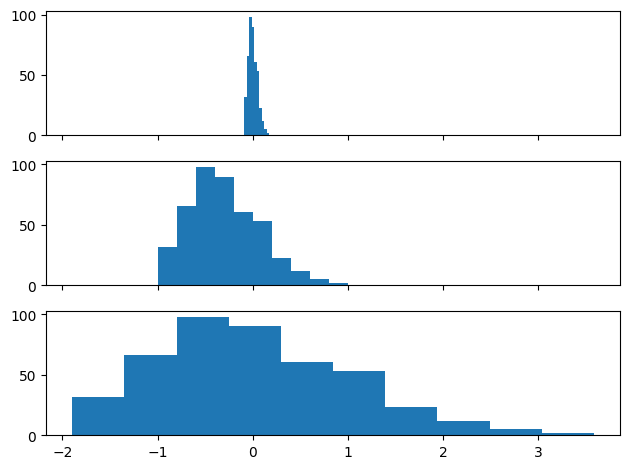

In [2]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

print(raw[0:5])
axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [3]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [4]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.13198334499975317 
trainning time for scaled data : 0.08839502900082152
trainning time for z_scaled data : 0.08507204099987575


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [5]:
df = pd.read_csv('cars.csv')

In [6]:
df.price_usd.hist()

<AxesSubplot: >

Transformación con $$tanh(x)$$

<AxesSubplot: >

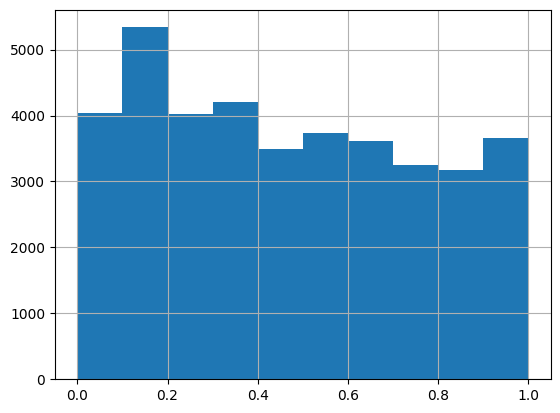

In [7]:
p = 10000 #probar
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd2fca3f-dc64-4c71-8bd4-adda531fa911' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>